In [2]:
%%time
import urllib
import requests
import re
import pandas as pd
#import pymysql
import os
import time

#爬虫抓取网页函数
def getHtml(url):
    html = urllib.request.urlopen(url).read()
    html = html.decode('gbk')
    return html

def gethtml(url):
    try:
        headers = {'User_Agent':
                   'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.168 Safari/537.36'}
        r = requests.get(url, timeout = 30,headers = headers)
        r.raise_for_status()
        r.encoding = 'gbk'
        return r.text
    except:
        return "产生异常"

#抓取网页股票代码函数
def getStockCode(html):
    s = r'<li><a target="_blank" href="http://quote.eastmoney.com/(.*?).html">'
    pat = re.compile(s)
    code = pat.findall(html)
    stockname = re.findall(re.compile(r'html">(.*)<\/a>'),html)
    return code,stockname

def dropAsterisk(name):
    if '*' in name:
        name = name.replace('*','星')
    return name

def get_time(stockcode):
    url = 'http://quotes.money.163.com/trade/lsjysj_{}.html'.format(stockcode)
    text = gethtml(url)
    starttime = re.findall(re.compile(r'<input type="radio" name="date_start_type" value="(.*?)" >'),text)[0].replace('-','')
    endtime = re.findall(re.compile(r'<input type="radio" name="date_end_type" value="(.*?)" '),text)[0].replace('-','')
    return starttime,endtime
    
Url = 'http://quote.eastmoney.com/stocklist.html'#东方财富网股票数据连接地址
filepath = 'D:\\data\\'#定义数据文件保存路径
#实施抓取
'''东方财富网的A股列表有变化'''
code,stockname = getStockCode(gethtml(Url))


#获取所有股票代码（以601,600,603开头的，应该是沪市数据）集合           
#抓取数据并保存到本地csv文件
m = 1
n = 1
for i,item in enumerate(code):
    if (item[0:5] in ['sh600','sh601','sh603']): 
        t1 = time.time()
        print('正在获取第%d只沪市股票，代码为%s数据，即%s'%(m,item,stockname[i]))
        #name = stockname[i][0:-8]
        stockcode = item[2:]
        starttime,endtime = get_time(stockcode)
        url = 'http://quotes.money.163.com/service/chddata.html?code=0{}&start={}&end={}&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;TURNOVER;VOTURNOVER;VATURNOVER;TCAP;MCAP'.format(stockcode,starttime,endtime)
        name = dropAsterisk(stockname[i])
        urllib.request.urlretrieve(url, filepath+'沪市\\'+name+'.csv')
        m+=1
        t2 = time.time()
        print('耗时%d秒'%(t2-t1))
        time.sleep(0.3)
        
    if (item[0:5] == 'sz000'):
        t1 = time.time()
        print('正在获取第%d只深市股票，代码为%s数据，即%s'%(n,item,stockname[i]))
        #name = stockname[i][0:-8]
        stockcode = item[2:]
        starttime,endtime = get_time(stockcode)
        url = 'http://quotes.money.163.com/service/chddata.html?code=1{}&start={}&end={}&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;TURNOVER;VOTURNOVER;VATURNOVER;TCAP;MCAP'.format(stockcode,starttime,endtime)
        name = dropAsterisk(stockname[i])
        urllib.request.urlretrieve(url, filepath+'深市\\'+name+'.csv')
        n+=1
        t2 = time.time()
        print('耗时%d秒'%(t2-t1))
        time.sleep(0.1)
    

Wall time: 115 ms


In [3]:
code

[]

In [ ]:
import requests
import re
from bs4 import BeautifulSoup

def gethtml(url):
    try:
        headers = {'User_Agent':
                   'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.168 Safari/537.36'}
        r = requests.get(url, timeout = 30,headers = headers)
        r.raise_for_status()
        r.encoding = 'gbk'
        return r.text
    except:
        return "产生异常"

url = r'http://quote.eastmoney.com/stocklist.html'
r = gethtml(url)
#bs = BeautifulSoup(r)
#print(bs.prettify)
print(r)


In [9]:
import os
import codecs
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from pylab import rcParams
plt.rcParams['font.sans-serif'] = ['SimHei']

root = r'D:\data'
stack = os.listdir(os.path.join(root,'深市'))
#stack

In [146]:
#pd.read_csv()
t = os.path.join(root,'深市\京东方A(000725).csv')
jdf = pd.read_csv(t,parse_dates=True,engine = 'python')
jdf.tail()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
4387,2001-01-18,'000725,京东方Ａ,18.92,19.40,18.82,18.85,18.91,0.01,0.0529,4.3466,2607946,4.979943e+07,7.569022e+09,1.135200e+09
4388,2001-01-17,'000725,京东方Ａ,18.91,19.80,18.82,19.38,19.38,-0.47,-2.4252,6.7209,4032516,7.720275e+07,7.565021e+09,1.134600e+09
4389,2001-01-16,'000725,京东方Ａ,19.38,20.38,19.00,20.00,20.49,-1.11,-5.4173,12.7461,7647631,1.497018e+08,7.753047e+09,1.162800e+09
4390,2001-01-15,'000725,京东方Ａ,20.49,21.80,20.49,21.80,22.77,-2.28,-10.0132,25.2921,15175264,3.157691e+08,8.197106e+09,1.229400e+09
4391,2001-01-12,'000725,京东方Ａ,22.77,24.80,17.80,19.32,16.80,5.97,35.5357,72.4335,43460112,8.810151e+08,9.109230e+09,1.366200e+09


In [147]:
jdf = jdf[jdf['日期']>'2016']
jdf.loc[:, '日期'] = pd.to_datetime(jdf['日期'],format='%Y-%m-%d')
jdf.sort_values(by='日期', inplace=True, ascending=True)
jdf.head()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
767,2016-01-04,'000725,京东方Ａ,2.78,2.98,2.77,2.97,2.97,-0.19,-6.3973,1.7745,414447279,1.205180e+09,9.772553e+10,6.492822e+10
766,2016-01-05,'000725,京东方Ａ,2.83,2.86,2.68,2.70,2.78,0.05,1.7986,2.6116,609955778,1.706986e+09,9.948318e+10,6.609599e+10
765,2016-01-06,'000725,京东方Ａ,2.95,2.96,2.82,2.84,2.83,0.12,4.2403,2.6028,607898914,1.763637e+09,1.037015e+11,6.889865e+10
764,2016-01-07,'000725,京东方Ａ,2.72,2.93,2.70,2.92,2.95,-0.23,-7.7966,0.8070,188482916,5.360986e+08,9.561634e+10,6.352689e+10
763,2016-01-08,'000725,京东方Ａ,2.84,2.88,2.72,2.82,2.72,0.12,4.4118,2.5451,594412854,1.677524e+09,9.983471e+10,6.632955e+10


Text(0, 0.5, 'close')

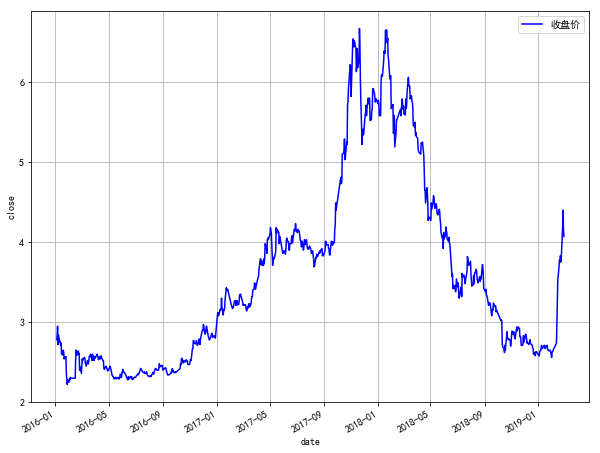

In [148]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
plt.rcParams['font.sans-serif'] = ['SimHei']

ax = jdf.plot(x='日期', y='收盘价', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("close")

In [149]:
jdf = jdf[:-100]

In [12]:
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA


In [150]:
ADF(jdf['收盘价'])

(-1.4821653953089957,
 0.5423146937408768,
 18,
 649,
 {'1%': -3.440466106307706,
  '5%': -2.8660036655537744,
  '10%': -2.569147085049656},
 -1154.344971804228)

In [153]:
ADF(jdf['收盘价'].diff(1).dropna())[1]

2.643031254186757e-07

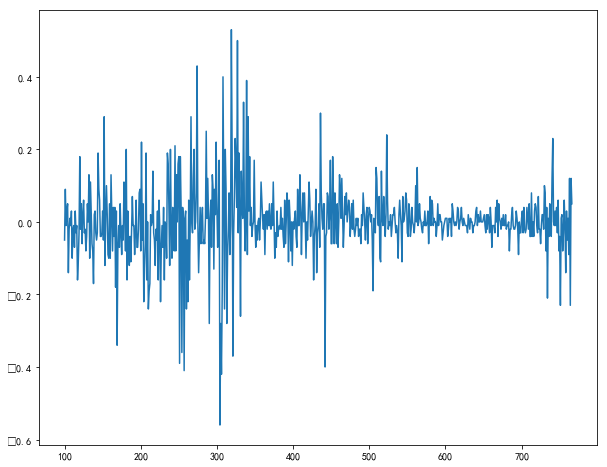

In [154]:
diff_jdf = jdf['收盘价'].diff().dropna()
diff_jdf.plot()

E:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


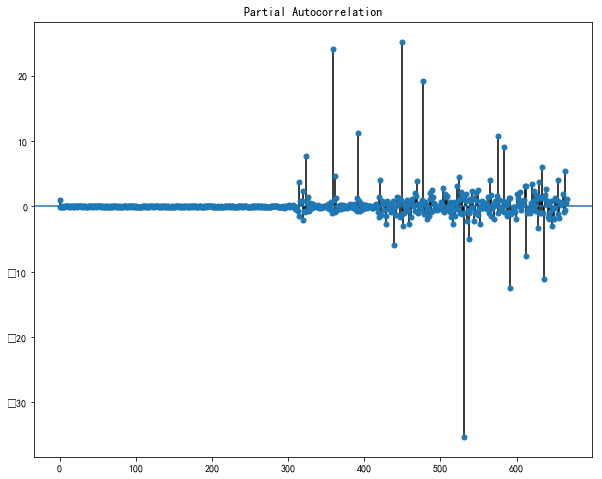

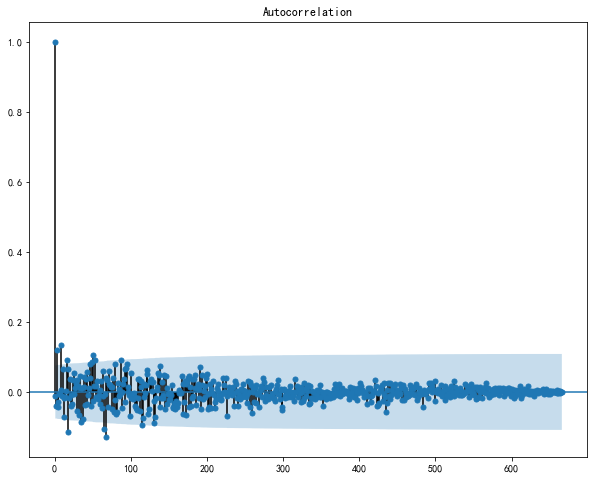

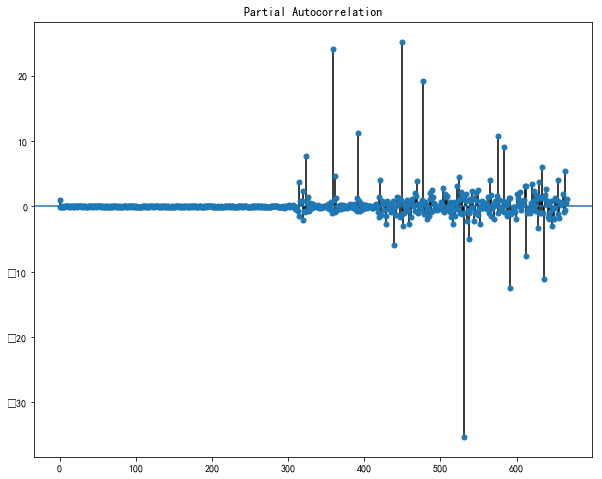

In [155]:
plot_acf(diff_jdf)
plot_pacf(diff_jdf)

In [156]:
tmp = []
for p in range(4):
    for q in range(4):
        try:
            tmp.append([ARIMA(jdf['收盘价'],(p,1,q)).fit().bic,p,q])
        except:
            tmp.append([None,p,q])
 
tmp = pd.DataFrame(tmp,columns = ['bic','p','q'])
tmp[tmp['bic'] ==tmp['bic'].min()]

E:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
E:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this w

,bic,p,q
0,-1166.754847,0,0


In [113]:
tmp

,bic,p,q
0,-1361.147219,0,0
1,-1354.884973,0,1
2,-1349.175153,0,2
3,-1353.446398,0,3
4,-1354.861489,1,0
5,NaN,1,1
6,NaN,1,2
7,NaN,1,3
8,-1348.844156,2,0
9,-1346.555762,2,1


In [114]:
model = ARIMA(jdf['收盘价'],(0,1,0)).fit()
model.summary()

E:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
E:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this w

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.收盘价   No. Observations:                  767
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 687.216
Method:                           css   S.D. of innovations              0.099
Date:                Sun, 03 Mar 2019   AIC                          -1370.432
Time:                        19:11:54   BIC                          -1361.147
Sample:                             1   HQIC                         -1366.858
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.004      0.472      0.637      -0.005       0.009
==============================================================================
"""

In [115]:
model.forecast(10)[0]

E:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
E:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
E:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

array([4.07168188, 4.07336375, 4.07504563, 4.07672751, 4.07840938,
       4.08009126, 4.08177314, 4.08345501, 4.08513689, 4.08681877])

In [67]:
jdf.tail()

,日期,股票代码,名称,收盘价,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,换手率,成交量,成交金额,总市值,流通市值
4,2019-02-22,'000725,京东方Ａ,3.81,3.84,3.70,3.71,3.75,0.06,1.6,4.7394,1604865720,6.065852e+09,1.325819e+11,1.290153e+11
3,2019-02-25,'000725,京东方Ａ,4.19,4.19,3.91,4.00,3.81,0.38,9.9738,7.2063,2440220226,1.009732e+10,1.458053e+11,1.418830e+11
2,2019-02-26,'000725,京东方Ａ,4.40,4.61,4.19,4.40,4.19,0.21,5.0119,11.9155,4034860434,1.784753e+10,1.531130e+11,1.489941e+11
1,2019-02-27,'000725,京东方Ａ,4.14,4.45,4.03,4.37,4.40,-0.26,-5.9091,8.6892,2942373367,1.257203e+10,1.440654e+11,1.401899e+11
0,2019-02-28,'000725,京东方Ａ,4.07,4.21,4.00,4.17,4.14,-0.07,-1.6908,5.2148,1765839052,7.234876e+09,1.416295e+11,1.378195e+11


In [ ]:
http://nufm.dfcfw.com/EM_Finance2014NumericApplication/JS.aspx?cb=jQuery112403523855554258337_1554345681854&type=CT&token=4f1862fc3b5e77c150a2b985b12db0fd&sty=FCOIATC&js=({data:[(x)],recordsFiltered:(tot)})&cmd=C._A&p=1&ps=3619

In [25]:
import requests
import pandas as pd
import numpy as np
import re
url = r'http://nufm.dfcfw.com/EM_Finance2014NumericApplication/JS.aspx?&type=CT&token=4f1862fc3b5e77c150a2b985b12db0fd&sty=FCOIATC&cmd=C._A&st=(ChangePercent)&sr=-1&p=1&ps=3169'

html = requests.get(url)
html = html.text

stock = re.findall(re.compile('\((.*)\)'),html)
stock = stock[0]
stock = stock.split('","')

stock[0] = stock[0][2:]
stock[-1] = stock[-1][:-2]
stock_data = []
for i,item in enumerate(stock):
    t = item.split(',')
    stock_data.append(t)
    
#print(stock_data)

columns = ['交易所','股票代码','股票名字','当前股价','涨跌额','涨跌幅','成交量（手）','成交额','振幅','最高','最低','今开','昨收','5分钟涨跌','量比','换手率','市盈率','市净率','总市值','流通市值','60日涨跌幅','年初至今涨跌幅','涨速','上市时间','数据时间','成交量']
data = pd.DataFrame(stock_data,columns = columns)
#data.head().T

columns = ['交易所','当前股价', '涨跌额', '涨跌幅', '成交量（手）', '成交额', '振幅',
       '最高', '最低', '今开', '昨收', '5分钟涨跌', '量比', '换手率',  '市净率', '总市值', '流通市值',
       '成交量']
data[columns] = data[columns].astype(np.float64)

data['市盈率'] = data['市盈率'].apply(lambda x:None if x == '-' else x)
data['市盈率'] = data['市盈率'].astype(np.float64) 

data['上市时间'] = pd.to_datetime(data['上市时间'],format= '%Y-%m-%d')
data['数据时间'] = pd.to_datetime(data['数据时间'],format= '%Y-%m-%d %H:%M:%S')

data['60日涨跌幅'] = data['60日涨跌幅'].str.strip("%").astype(float)/100
data['年初至今涨跌幅'] = data['年初至今涨跌幅'].str.strip("%").astype(float)/100

data['涨速'] = data['涨速'].apply(lambda x:None if x == '-' else x)
data['涨速'] = data['涨速'].astype(np.float64)

data['股票代码'] = data['股票代码'].apply(lambda x:'a'+x)
data['股票代码'] = data['股票代码'].astype(object)
data['交易所_'] = data['交易所'].apply(lambda x:'沪市' if x == 1 else '深市' )
data.head()

,交易所,股票代码,股票名字,当前股价,涨跌额,涨跌幅,成交量（手）,成交额,振幅,最高,...,市净率,总市值,流通市值,60日涨跌幅,年初至今涨跌幅,涨速,上市时间,数据时间,成交量,交易所_
0,2.0,a002496,辉丰股份,3.36,0.31,10.16,779456.0,258804329.0,10.82,3.36,...,1.56,5.065217e+09,3.192255e+09,0.5849,0.6634,0.0,2010-11-09,2019-04-04 15:00:00,779456.0,深市
1,2.0,a000607,华媒控股,6.89,0.63,10.06,822247.0,540459488.0,14.22,6.89,...,3.80,7.011942e+09,6.096685e+09,0.6212,0.6970,0.0,1996-08-30,2019-04-04 15:00:00,822247.0,深市
2,2.0,a300325,德威新材,5.36,0.49,10.06,919508.0,469184480.0,11.91,5.36,...,3.72,5.390783e+09,4.259963e+09,0.6341,0.6855,0.0,2012-06-01,2019-04-04 15:00:00,919508.0,深市
3,1.0,a600620,天宸股份,9.20,0.84,10.05,72514.0,66459251.0,8.97,9.20,...,2.74,6.317429e+09,6.317429e+09,0.6547,0.6881,0.0,1992-11-17,2019-04-04 15:00:00,72514.0,沪市
4,1.0,a600018,上港集团,8.87,0.81,10.05,413798.0,367038416.0,0.00,8.87,...,2.72,2.055505e+11,2.055505e+11,0.6895,0.7290,0.0,2006-10-26,2019-04-04 15:00:00,413798.0,沪市


In [27]:
data.to_csv('stock-A.csv')

In [17]:
%%time
import urllib
import pandas as pd
#import pymysql
import os
import time

def dropAsterisk(name):
    if '*' in name:
        name = name.replace('*','星')
    return name

filepath = 'D:\\data\\'#定义数据文件保存路径

stock = pd.read_csv('stock-A.csv',parse_dates=True,index_col=0)
stock['股票代码'] = stock['股票代码'].apply(lambda x:x[1:])
stock['上市时间'] = stock['上市时间'].str.replace('-','')
stock['数据时间'] = stock['数据时间'].str.replace('-','')

m = 1
n = 1

for i in range(len(stock)):
    stockname = stock['股票名字'][i]
    stockcode = stock['股票代码'][i]
    starttime,endtime = stock['上市时间'][i],stock['数据时间'][i][:8]
    stock_ex = stock['交易所'][i]
    name = dropAsterisk(stockname)
    file_name = name+stockcode+'.csv'
    #print('done1')
    if (stock_ex == 1): 
        t1 = time.time()
        print('正在获取第%d只沪市股票，代码为%s数据，即%s'%(m,stockcode,stockname))
        url = 'http://quotes.money.163.com/service/chddata.html?code=0{}&start={}&end={}&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;TURNOVER;VOTURNOVER;VATURNOVER;TCAP;MCAP'.format(stockcode,starttime,endtime)
        urllib.request.urlretrieve(url, filepath+'沪市\\'+file_name)
        m+=1
        t2 = time.time()
        print('耗时%d秒'%(t2-t1))
        time.sleep(0.3)
    elif (stock_ex== 2):
        #print('done3')
        t1 = time.time()
        print('正在获取第%d只深市股票，代码为%s数据，即%s'%(n,stockcode,stockname))
        url = 'http://quotes.money.163.com/service/chddata.html?code=1{}&start={}&end={}&fields=TCLOSE;HIGH;LOW;TOPEN;LCLOSE;CHG;PCHG;TURNOVER;VOTURNOVER;VATURNOVER;TCAP;MCAP'.format(stockcode,starttime,endtime)
        urllib.request.urlretrieve(url, filepath+'深市\\'+file_name)
        n+=1
        t2 = time.time()
        print('耗时%d秒'%(t2-t1))
        time.sleep(0.1)
    else:
        print('非A股股票')
    

正在获取第1只深市股票，代码为002496数据，即辉丰股份
耗时0秒
正在获取第2只深市股票，代码为000607数据，即华媒控股
耗时1秒
正在获取第3只深市股票，代码为300325数据，即德威新材
耗时0秒
正在获取第1只沪市股票，代码为600620数据，即天宸股份
耗时1秒
正在获取第2只沪市股票，代码为600018数据，即上港集团
耗时0秒
正在获取第4只深市股票，代码为000729数据，即燕京啤酒
耗时1秒
正在获取第5只深市股票，代码为300061数据，即康旗股份
耗时0秒
正在获取第6只深市股票，代码为002279数据，即久其软件
耗时0秒
正在获取第3只沪市股票，代码为600638数据，即新黄浦
耗时1秒
正在获取第7只深市股票，代码为002548数据，即金新农
耗时0秒
正在获取第8只深市股票，代码为300718数据，即长盛轴承
耗时0秒
正在获取第4只沪市股票，代码为603085数据，即天成自控
耗时0秒
正在获取第9只深市股票，代码为300561数据，即汇金科技
耗时0秒
正在获取第5只沪市股票，代码为600561数据，即江西长运
耗时0秒
正在获取第10只深市股票，代码为300554数据，即三超新材
耗时0秒
正在获取第11只深市股票，代码为300240数据，即飞力达
耗时0秒
正在获取第12只深市股票，代码为002597数据，即金禾实业
耗时0秒
正在获取第13只深市股票，代码为300194数据，即福安药业
耗时0秒
正在获取第14只深市股票，代码为000990数据，即诚志股份
耗时0秒
正在获取第6只沪市股票，代码为600969数据，即郴电国际
耗时0秒
正在获取第15只深市股票，代码为300099数据，即精准信息
耗时0秒
正在获取第16只深市股票，代码为002825数据，即纳尔股份
耗时0秒
正在获取第17只深市股票，代码为002790数据，即瑞尔特
耗时0秒
正在获取第18只深市股票，代码为300250数据，即初灵信息
耗时0秒
正在获取第19只深市股票，代码为300461数据，即田中精机
耗时0秒
正在获取第7只沪市股票，代码为600793数据，即宜宾纸业
耗时1秒
正在获取第20只深市股票，代码为002952数据，即亚世光电
耗时0秒
正在获取第8只沪市股票，代码为600115数据，即东方航空
耗时0秒
正在获取第21只深市股票，

正在获取第132只深市股票，代码为002092数据，即中泰化学
耗时0秒
正在获取第133只深市股票，代码为000858数据，即五粮液
耗时0秒
正在获取第98只沪市股票，代码为600238数据，即*ST椰岛
耗时1秒
正在获取第134只深市股票，代码为000633数据，即合金投资
耗时0秒
正在获取第135只深市股票，代码为000422数据，即*ST宜化
耗时0秒
正在获取第99只沪市股票，代码为600234数据，即ST山水
耗时0秒
正在获取第136只深市股票，代码为002570数据，即*ST因美
耗时0秒
正在获取第137只深市股票，代码为000995数据，即*ST皇台
耗时0秒
正在获取第138只深市股票，代码为000893数据，即*ST东凌
耗时0秒
正在获取第100只沪市股票，代码为600735数据，即新华锦
耗时1秒
正在获取第101只沪市股票，代码为600198数据，即*ST大唐
耗时0秒
正在获取第102只沪市股票，代码为600423数据，即*ST柳化
耗时0秒
正在获取第139只深市股票，代码为002188数据，即*ST巴士
耗时0秒
正在获取第103只沪市股票，代码为600088数据，即中视传媒
耗时1秒
正在获取第140只深市股票，代码为000525数据，即红太阳
耗时1秒
正在获取第104只沪市股票，代码为601866数据，即中远海发
耗时0秒
正在获取第141只深市股票，代码为002221数据，即东华能源
耗时0秒
正在获取第142只深市股票，代码为300411数据，即金盾股份
耗时0秒
正在获取第143只深市股票，代码为002875数据，即安奈儿
耗时0秒
正在获取第144只深市股票，代码为002863数据，即今飞凯达
耗时0秒
正在获取第145只深市股票，代码为002819数据，即东方中科
耗时0秒
正在获取第146只深市股票，代码为002103数据，即广博股份
耗时0秒
正在获取第147只深市股票，代码为002149数据，即西部材料
耗时0秒
正在获取第148只深市股票，代码为002846数据，即英联股份
耗时0秒
正在获取第149只深市股票，代码为000676数据，即智度股份
耗时1秒
正在获取第105只沪市股票，代码为600649数据，即城投控股
耗时1秒
正在获取第106只沪市股票，代码为603121数据，即华培动力
耗时0秒

正在获取第261只深市股票，代码为002396数据，即星网锐捷
耗时0秒
正在获取第191只沪市股票，代码为603800数据，即道森股份
耗时0秒
正在获取第262只深市股票，代码为000752数据，即西藏发展
耗时0秒
正在获取第263只深市股票，代码为300577数据，即开润股份
耗时0秒
正在获取第264只深市股票，代码为002504数据，即弘高创意
耗时0秒
正在获取第265只深市股票，代码为002787数据，即华源控股
耗时0秒
正在获取第192只沪市股票，代码为603038数据，即华立股份
耗时0秒
正在获取第266只深市股票，代码为002646数据，即青青稞酒
耗时0秒
正在获取第267只深市股票，代码为002674数据，即兴业科技
耗时0秒
正在获取第193只沪市股票，代码为603708数据，即家家悦
耗时0秒
正在获取第194只沪市股票，代码为600184数据，即光电股份
耗时0秒
正在获取第195只沪市股票，代码为603388数据，即元成股份
耗时0秒
正在获取第268只深市股票，代码为002740数据，即爱迪尔
耗时0秒
正在获取第196只沪市股票，代码为600313数据，即农发种业
耗时0秒
正在获取第269只深市股票，代码为002019数据，即亿帆医药
耗时0秒
正在获取第197只沪市股票，代码为600527数据，即江南高纤
耗时0秒
正在获取第198只沪市股票，代码为600686数据，即金龙汽车
耗时1秒
正在获取第199只沪市股票，代码为600386数据，即北巴传媒
耗时0秒
正在获取第270只深市股票，代码为300084数据，即海默科技
耗时0秒
正在获取第271只深市股票，代码为300038数据，即数知科技
耗时0秒
正在获取第272只深市股票，代码为002949数据，即华阳国际
耗时0秒
正在获取第200只沪市股票，代码为600078数据，即澄星股份
耗时0秒
正在获取第201只沪市股票，代码为600126数据，即杭钢股份
耗时0秒
正在获取第202只沪市股票，代码为600731数据，即湖南海利
耗时0秒
正在获取第203只沪市股票，代码为600866数据，即星湖科技
耗时0秒
正在获取第204只沪市股票，代码为603518数据，即维格娜丝
耗时0秒
正在获取第273只深市股票，代码为002054数据，即德美化工
耗时0秒
正在获

耗时0秒
正在获取第395只深市股票，代码为002942数据，即新农股份
耗时0秒
正在获取第396只深市股票，代码为002239数据，即奥特佳
耗时0秒
正在获取第397只深市股票，代码为300207数据，即欣旺达
耗时0秒
正在获取第280只沪市股票，代码为600408数据，即ST安泰
耗时0秒
正在获取第281只沪市股票，代码为603618数据，即杭电股份
耗时0秒
正在获取第282只沪市股票，代码为600436数据，即片仔癀
耗时0秒
正在获取第283只沪市股票，代码为600939数据，即重庆建工
耗时0秒
正在获取第284只沪市股票，代码为601100数据，即恒立液压
耗时0秒
正在获取第398只深市股票，代码为000875数据，即吉电股份
耗时0秒
正在获取第285只沪市股票，代码为600021数据，即上海电力
耗时0秒
正在获取第399只深市股票，代码为002350数据，即北京科锐
耗时0秒
正在获取第286只沪市股票，代码为600624数据，即复旦复华
耗时1秒
正在获取第400只深市股票，代码为300224数据，即正海磁材
耗时0秒
正在获取第401只深市股票，代码为002341数据，即新纶科技
耗时0秒
正在获取第287只沪市股票，代码为600000数据，即浦发银行
耗时1秒
正在获取第402只深市股票，代码为000572数据，即海马汽车
耗时0秒
正在获取第288只沪市股票，代码为600463数据，即空港股份
耗时0秒
正在获取第403只深市股票，代码为300156数据，即神雾环保
耗时0秒
正在获取第289只沪市股票，代码为600717数据，即天津港
耗时0秒
正在获取第290只沪市股票，代码为603810数据，即丰山集团
耗时0秒
正在获取第404只深市股票，代码为002469数据，即三维工程
耗时0秒
正在获取第291只沪市股票，代码为600176数据，即中国巨石
耗时0秒
正在获取第405只深市股票，代码为300757数据，即罗博特科
耗时0秒
正在获取第406只深市股票，代码为002052数据，即同洲电子
耗时0秒
正在获取第292只沪市股票，代码为600908数据，即无锡银行
耗时0秒
正在获取第407只深市股票，代码为002599数据，即盛通股份
耗时0秒
正在获取第293只沪市股票，代码为603811数据，即诚意药业
耗时0秒


正在获取第505只深市股票，代码为300590数据，即移为通信
耗时0秒
正在获取第506只深市股票，代码为300413数据，即芒果超媒
耗时0秒
正在获取第392只沪市股票，代码为600259数据，即广晟有色
耗时1秒
正在获取第393只沪市股票，代码为600197数据，即伊力特
耗时0秒
正在获取第507只深市股票，代码为002901数据，即大博医疗
耗时0秒
正在获取第508只深市股票，代码为002028数据，即思源电气
耗时0秒
正在获取第509只深市股票，代码为000731数据，即四川美丰
耗时0秒
正在获取第510只深市股票，代码为000950数据，即重药控股
耗时1秒
正在获取第394只沪市股票，代码为600983数据，即惠而浦
耗时0秒
正在获取第511只深市股票，代码为002803数据，即吉宏股份
耗时0秒
正在获取第395只沪市股票，代码为601015数据，即陕西黑猫
耗时0秒
正在获取第396只沪市股票，代码为600617数据，即国新能源
耗时2秒
正在获取第512只深市股票，代码为000980数据，即众泰汽车
耗时1秒
正在获取第513只深市股票，代码为300004数据，即南风股份
耗时1秒
正在获取第397只沪市股票，代码为600959数据，即江苏有线
耗时0秒
正在获取第398只沪市股票，代码为603398数据，即邦宝益智
耗时0秒
正在获取第514只深市股票，代码为000782数据，即美达股份
耗时0秒
正在获取第399只沪市股票，代码为603826数据，即坤彩科技
耗时0秒
正在获取第515只深市股票，代码为002472数据，即双环传动
耗时0秒
正在获取第400只沪市股票，代码为603227数据，即雪峰科技
耗时0秒
正在获取第401只沪市股票，代码为600644数据，即乐山电力
耗时1秒
正在获取第402只沪市股票，代码为603536数据，即惠发股份
耗时0秒
正在获取第516只深市股票，代码为002917数据，即金奥博
耗时0秒
正在获取第517只深市股票，代码为300408数据，即三环集团
耗时0秒
正在获取第403只沪市股票，代码为600642数据，即申能股份
耗时0秒
正在获取第404只沪市股票，代码为600329数据，即中新药业
耗时0秒
正在获取第405只沪市股票，代码为603768数据，即常青股份
耗时0秒
正在获取

耗时0秒
正在获取第619只深市股票，代码为002657数据，即中科金财
耗时0秒
正在获取第501只沪市股票，代码为600127数据，即金健米业
耗时0秒
正在获取第620只深市股票，代码为300231数据，即银信科技
耗时0秒
正在获取第621只深市股票，代码为000401数据，即冀东水泥
耗时0秒
正在获取第622只深市股票，代码为000922数据，即佳电股份
耗时0秒
正在获取第502只沪市股票，代码为600917数据，即重庆燃气
耗时0秒
正在获取第623只深市股票，代码为002347数据，即泰尔股份
耗时0秒
正在获取第503只沪市股票，代码为600348数据，即阳泉煤业
耗时0秒
正在获取第504只沪市股票，代码为600108数据，即亚盛集团
耗时0秒
正在获取第505只沪市股票，代码为600745数据，即闻泰科技
耗时0秒
正在获取第506只沪市股票，代码为603779数据，即威龙股份
耗时0秒
正在获取第507只沪市股票，代码为600035数据，即楚天高速
耗时0秒
正在获取第624只深市股票，代码为000811数据，即冰轮环境
耗时0秒
正在获取第625只深市股票，代码为000429数据，即粤高速A
耗时0秒
正在获取第508只沪市股票，代码为603029数据，即天鹅股份
耗时0秒
正在获取第509只沪市股票，代码为601717数据，即郑煤机
耗时0秒
正在获取第626只深市股票，代码为000758数据，即中色股份
耗时1秒
正在获取第627只深市股票，代码为002023数据，即海特高新
耗时0秒
正在获取第628只深市股票，代码为002084数据，即海鸥住工
耗时0秒
正在获取第629只深市股票，代码为002623数据，即亚玛顿
耗时0秒
正在获取第510只沪市股票，代码为601211数据，即国泰君安
耗时0秒
正在获取第630只深市股票，代码为002303数据，即美盈森
耗时0秒
正在获取第511只沪市股票，代码为600529数据，即山东药玻
耗时0秒
正在获取第512只沪市股票，代码为600791数据，即京能置业
耗时0秒
正在获取第631只深市股票，代码为002437数据，即誉衡药业
耗时0秒
正在获取第632只深市股票，代码为300475数据，即聚隆科技
耗时0秒
正在获取第633只深市股票，代码为000825数据，即太钢不锈
耗时0秒

正在获取第753只深市股票，代码为300245数据，即天玑科技
耗时0秒
正在获取第754只深市股票，代码为300433数据，即蓝思科技
耗时0秒
正在获取第589只沪市股票，代码为600281数据，即太化股份
耗时0秒
正在获取第755只深市股票，代码为300298数据，即三诺生物
耗时0秒
正在获取第590只沪市股票，代码为600853数据，即龙建股份
耗时0秒
正在获取第591只沪市股票，代码为601318数据，即中国平安
耗时0秒
正在获取第592只沪市股票，代码为601369数据，即陕鼓动力
耗时0秒
正在获取第756只深市股票，代码为300558数据，即贝达药业
耗时0秒
正在获取第757只深市股票，代码为300075数据，即数字政通
耗时0秒
正在获取第758只深市股票，代码为002778数据，即高科石化
耗时0秒
正在获取第593只沪市股票，代码为603596数据，即伯特利
耗时3秒
正在获取第594只沪市股票，代码为603199数据，即九华旅游
耗时0秒
正在获取第595只沪市股票，代码为600992数据，即贵绳股份
耗时0秒
正在获取第759只深市股票，代码为000554数据，即泰山石油
耗时1秒
正在获取第760只深市股票，代码为000799数据，即酒鬼酒
耗时1秒
正在获取第761只深市股票，代码为300476数据，即胜宏科技
耗时0秒
正在获取第762只深市股票，代码为300525数据，即博思软件
耗时0秒
正在获取第763只深市股票，代码为002051数据，即中工国际
耗时0秒
正在获取第764只深市股票，代码为002645数据，即华宏科技
耗时0秒
正在获取第596只沪市股票，代码为603133数据，即碳元科技
耗时0秒
正在获取第765只深市股票，代码为002817数据，即黄山胶囊
耗时0秒
正在获取第597只沪市股票，代码为600458数据，即时代新材
耗时0秒
正在获取第598只沪市股票，代码为600062数据，即华润双鹤
耗时0秒
正在获取第766只深市股票，代码为002477数据，即雏鹰农牧
耗时0秒
正在获取第599只沪市股票，代码为601567数据，即三星医疗
耗时0秒
正在获取第767只深市股票，代码为000697数据，即炼石航空
耗时0秒
正在获取第768只深市股票，代码为002445数据，即ST中南
耗时0秒
正在获

耗时0秒
正在获取第689只沪市股票，代码为600888数据，即新疆众和
耗时0秒
正在获取第875只深市股票，代码为002011数据，即盾安环境
耗时0秒
正在获取第876只深市股票，代码为300487数据，即蓝晓科技
耗时0秒
正在获取第690只沪市股票，代码为603305数据，即旭升股份
耗时0秒
正在获取第877只深市股票，代码为002459数据，即天业通联
耗时0秒
正在获取第878只深市股票，代码为002643数据，即万润股份
耗时0秒
正在获取第691只沪市股票，代码为600676数据，即交运股份
耗时0秒
正在获取第879只深市股票，代码为300599数据，即雄塑科技
耗时0秒
正在获取第880只深市股票，代码为000839数据，即中信国安
耗时1秒
正在获取第881只深市股票，代码为300169数据，即天晟新材
耗时0秒
正在获取第882只深市股票，代码为002822数据，即中装建设
耗时0秒
正在获取第692只沪市股票，代码为603083数据，即剑桥科技
耗时0秒
正在获取第693只沪市股票，代码为600732数据，即ST新梅
耗时0秒
正在获取第883只深市股票，代码为300506数据，即名家汇
耗时0秒
正在获取第884只深市股票，代码为002757数据，即南兴装备
耗时0秒
正在获取第885只深市股票，代码为002556数据，即辉隆股份
耗时0秒
正在获取第886只深市股票，代码为002482数据，即广田集团
耗时0秒
正在获取第887只深市股票，代码为002603数据，即以岭药业
耗时0秒
正在获取第888只深市股票，代码为000999数据，即华润三九
耗时0秒
正在获取第694只沪市股票，代码为600865数据，即百大集团
耗时0秒
正在获取第889只深市股票，代码为000928数据，即中钢国际
耗时1秒
正在获取第695只沪市股票，代码为600156数据，即华升股份
耗时0秒
正在获取第696只沪市股票，代码为600699数据，即均胜电子
耗时1秒
正在获取第890只深市股票，代码为000829数据，即天音控股
耗时1秒
正在获取第697只沪市股票，代码为603566数据，即普莱柯
耗时0秒
正在获取第698只沪市股票，代码为600894数据，即广日股份
耗时0秒
正在获取第699只沪市股票，代码为603303数据，即得邦照明
耗时0

耗时0秒
正在获取第997只深市股票，代码为000766数据，即通化金马
耗时0秒
正在获取第998只深市股票，代码为002780数据，即三夫户外
耗时0秒
正在获取第790只沪市股票，代码为600874数据，即创业环保
耗时0秒
正在获取第999只深市股票，代码为002317数据，即众生药业
耗时0秒
正在获取第791只沪市股票，代码为603963数据，即大理药业
耗时0秒
正在获取第1000只深市股票，代码为000930数据，即中粮生化
耗时1秒
正在获取第792只沪市股票，代码为601933数据，即永辉超市
耗时0秒
正在获取第1001只深市股票，代码为300459数据，即金科文化
耗时0秒
正在获取第1002只深市股票，代码为002057数据，即中钢天源
耗时0秒
正在获取第1003只深市股票，代码为300625数据，即三雄极光
耗时0秒
正在获取第1004只深市股票，代码为300455数据，即康拓红外
耗时0秒
正在获取第793只沪市股票，代码为603033数据，即三维股份
耗时0秒
正在获取第1005只深市股票，代码为002443数据，即金洲管道
耗时0秒
正在获取第1006只深市股票，代码为002216数据，即三全食品
耗时0秒
正在获取第794只沪市股票，代码为600213数据，即亚星客车
耗时1秒
正在获取第795只沪市股票，代码为600773数据，即西藏城投
耗时1秒
正在获取第796只沪市股票，代码为600306数据，即商业城
耗时0秒
正在获取第1007只深市股票，代码为002775数据，即文科园林
耗时0秒
正在获取第797只沪市股票，代码为600466数据，即蓝光发展
耗时0秒
正在获取第798只沪市股票，代码为600260数据，即凯乐科技
耗时0秒
正在获取第799只沪市股票，代码为600997数据，即开滦股份
耗时0秒
正在获取第1008只深市股票，代码为002349数据，即精华制药
耗时0秒
正在获取第1009只深市股票，代码为002806数据，即华锋股份
耗时0秒
正在获取第1010只深市股票，代码为300276数据，即三丰智能
耗时0秒
正在获取第800只沪市股票，代码为600510数据，即黑牡丹
耗时0秒
正在获取第1011只深市股票，代码为000650数据，即仁和药业
耗时0秒
正在获取第1012只深市股票，代码为30008

耗时0秒
正在获取第1120只深市股票，代码为000975数据，即银泰资源
耗时0秒
正在获取第1121只深市股票，代码为002705数据，即新宝股份
耗时0秒
正在获取第886只沪市股票，代码为600876数据，即洛阳玻璃
耗时0秒
正在获取第887只沪市股票，代码为600293数据，即三峡新材
耗时0秒
正在获取第888只沪市股票，代码为603657数据，即春光科技
耗时0秒
正在获取第1122只深市股票，代码为000727数据，即华东科技
耗时0秒
正在获取第1123只深市股票，代码为300710数据，即万隆光电
耗时0秒
正在获取第889只沪市股票，代码为603277数据，即银都股份
耗时0秒
正在获取第1124只深市股票，代码为300375数据，即鹏翎股份
耗时0秒
正在获取第890只沪市股票，代码为600628数据，即新世界
耗时0秒
正在获取第1125只深市股票，代码为300750数据，即宁德时代
耗时0秒
正在获取第891只沪市股票，代码为600653数据，即申华控股
耗时1秒
正在获取第892只沪市股票，代码为603558数据，即健盛集团
耗时0秒
正在获取第893只沪市股票，代码为600882数据，即妙可蓝多
耗时0秒
正在获取第1126只深市股票，代码为002338数据，即奥普光电
耗时0秒
正在获取第1127只深市股票，代码为300609数据，即汇纳科技
耗时0秒
正在获取第1128只深市股票，代码为300504数据，即天邑股份
耗时0秒
正在获取第1129只深市股票，代码为300686数据，即智动力
耗时0秒
正在获取第1130只深市股票，代码为002161数据，即远望谷
耗时0秒
正在获取第1131只深市股票，代码为300082数据，即奥克股份
耗时0秒
正在获取第894只沪市股票，代码为603181数据，即皇马科技
耗时0秒
正在获取第895只沪市股票，代码为600576数据，即祥源文化
耗时0秒
正在获取第896只沪市股票，代码为600243数据，即青海华鼎
耗时0秒
正在获取第897只沪市股票，代码为603081数据，即大丰实业
耗时0秒
正在获取第898只沪市股票，代码为600789数据，即鲁抗医药
耗时0秒
正在获取第1132只深市股票，代码为000779数据，即三毛派神
耗时1秒
正在获取第1133只深市股票，代码为00275

耗时1秒
正在获取第985只沪市股票，代码为603063数据，即禾望电气
耗时0秒
正在获取第1240只深市股票，代码为002902数据，即铭普光磁
耗时0秒
正在获取第1241只深市股票，代码为300677数据，即英科医疗
耗时0秒
正在获取第1242只深市股票，代码为300217数据，即东方电热
耗时0秒
正在获取第1243只深市股票，代码为002638数据，即勤上股份
耗时0秒
正在获取第1244只深市股票，代码为300304数据，即云意电气
耗时0秒
正在获取第986只沪市股票，代码为601198数据，即东兴证券
耗时0秒
正在获取第1245只深市股票，代码为000877数据，即天山股份
耗时0秒
正在获取第1246只深市股票，代码为300395数据，即菲利华
耗时0秒
正在获取第1247只深市股票，代码为000665数据，即湖北广电
耗时0秒
正在获取第1248只深市股票，代码为002285数据，即世联行
耗时0秒
正在获取第1249只深市股票，代码为300547数据，即川环科技
耗时0秒
正在获取第987只沪市股票，代码为600890数据，即中房股份
耗时0秒
正在获取第1250只深市股票，代码为002545数据，即东方铁塔
耗时0秒
正在获取第1251只深市股票，代码为300369数据，即绿盟科技
耗时0秒
正在获取第1252只深市股票，代码为002574数据，即明牌珠宝
耗时0秒
正在获取第1253只深市股票，代码为002619数据，即艾格拉斯
耗时0秒
正在获取第988只沪市股票，代码为603286数据，即日盈电子
耗时0秒
正在获取第989只沪市股票，代码为603139数据，即康惠制药
耗时0秒
正在获取第1254只深市股票，代码为300725数据，即药石科技
耗时0秒
正在获取第990只沪市股票，代码为600372数据，即中航电子
耗时0秒
正在获取第1255只深市股票，代码为000582数据，即北部湾港
耗时0秒
正在获取第1256只深市股票，代码为002342数据，即巨力索具
耗时0秒
正在获取第1257只深市股票，代码为002271数据，即东方雨虹
耗时0秒
正在获取第1258只深市股票，代码为300760数据，即迈瑞医疗
耗时0秒
正在获取第991只沪市股票，代码为603316数据，即诚邦股份
耗时0秒
正在获取第1259只深市股票，代

耗时0秒
正在获取第1069只沪市股票，代码为603269数据，即海鸥股份
耗时0秒
正在获取第1373只深市股票，代码为000988数据，即华工科技
耗时0秒
正在获取第1374只深市股票，代码为002544数据，即杰赛科技
耗时0秒
正在获取第1375只深市股票，代码为002867数据，即周大生
耗时0秒
正在获取第1376只深市股票，代码为000502数据，即绿景控股
耗时2秒
正在获取第1377只深市股票，代码为300098数据，即高新兴
耗时0秒
正在获取第1070只沪市股票，代码为603688数据，即石英股份
耗时0秒
正在获取第1071只沪市股票，代码为600180数据，即瑞茂通
耗时0秒
正在获取第1378只深市股票，代码为300742数据，即越博动力
耗时0秒
正在获取第1379只深市股票，代码为300145数据，即中金环境
耗时0秒
正在获取第1380只深市股票，代码为300292数据，即吴通控股
耗时0秒
正在获取第1381只深市股票，代码为300275数据，即梅安森
耗时0秒
正在获取第1382只深市股票，代码为000042数据，即中洲控股
耗时1秒
正在获取第1383只深市股票，代码为002214数据，即大立科技
耗时0秒
正在获取第1384只深市股票，代码为300034数据，即钢研高纳
耗时0秒
正在获取第1385只深市股票，代码为300273数据，即和佳股份
耗时0秒
正在获取第1386只深市股票，代码为002851数据，即麦格米特
耗时0秒
正在获取第1387只深市股票，代码为002494数据，即华斯股份
耗时0秒
正在获取第1388只深市股票，代码为002172数据，即澳洋健康
耗时0秒
正在获取第1389只深市股票，代码为002577数据，即雷柏科技
耗时0秒
正在获取第1072只沪市股票，代码为603078数据，即江化微
耗时0秒
正在获取第1073只沪市股票，代码为600929数据，即湖南盐业
耗时0秒
正在获取第1074只沪市股票，代码为600229数据，即城市传媒
耗时1秒
正在获取第1390只深市股票，代码为000517数据，即荣安地产
耗时0秒
正在获取第1391只深市股票，代码为002719数据，即麦趣尔
耗时0秒
正在获取第1392只深市股票，代码为300360数据，即炬华科技
耗时0秒
正在获取第1075只沪市股

耗时0秒
正在获取第1142只沪市股票，代码为600613数据，即神奇制药
耗时1秒
正在获取第1517只深市股票，代码为002431数据，即棕榈股份
耗时0秒
正在获取第1518只深市股票，代码为000019数据，即深粮控股
耗时1秒
正在获取第1519只深市股票，代码为000688数据，即国城矿业
耗时0秒
正在获取第1520只深市股票，代码为300626数据，即华瑞股份
耗时0秒
正在获取第1143只沪市股票，代码为603477数据，即振静股份
耗时0秒
正在获取第1521只深市股票，代码为002363数据，即隆基机械
耗时0秒
正在获取第1144只沪市股票，代码为603861数据，即白云电器
耗时0秒
正在获取第1145只沪市股票，代码为600626数据，即申达股份
耗时1秒
正在获取第1522只深市股票，代码为300587数据，即天铁股份
耗时0秒
正在获取第1523只深市股票，代码为002251数据，即步步高
耗时0秒
正在获取第1146只沪市股票，代码为600754数据，即锦江股份
耗时0秒
正在获取第1147只沪市股票，代码为600531数据，即豫光金铅
耗时0秒
正在获取第1524只深市股票，代码为002321数据，即华英农业
耗时0秒
正在获取第1525只深市股票，代码为002589数据，即瑞康医药
耗时0秒
正在获取第1526只深市股票，代码为300373数据，即扬杰科技
耗时0秒
正在获取第1527只深市股票，代码为000816数据，即*ST慧业
耗时0秒
正在获取第1528只深市股票，代码为002255数据，即海陆重工
耗时0秒
正在获取第1529只深市股票，代码为300543数据，即朗科智能
耗时0秒
正在获取第1530只深市股票，代码为300453数据，即三鑫医疗
耗时0秒
正在获取第1531只深市股票，代码为002685数据，即华东重机
耗时0秒
正在获取第1532只深市股票，代码为002458数据，即益生股份
耗时0秒
正在获取第1148只沪市股票，代码为603259数据，即药明康德
耗时0秒
正在获取第1149只沪市股票，代码为603040数据，即新坐标
耗时0秒
正在获取第1533只深市股票，代码为002649数据，即博彦科技
耗时0秒
正在获取第1150只沪市股票，代码为600363数据，即联创光电
耗时0秒
正在获取第153

耗时0秒
正在获取第1652只深市股票，代码为000536数据，即华映科技
耗时0秒
正在获取第1224只沪市股票，代码为600767数据，即ST运盛
耗时0秒
正在获取第1225只沪市股票，代码为600774数据，即汉商集团
耗时0秒
正在获取第1653只深市股票，代码为002400数据，即省广集团
耗时0秒
正在获取第1654只深市股票，代码为002490数据，即山东墨龙
耗时0秒
正在获取第1655只深市股票，代码为002602数据，即世纪华通
耗时0秒
正在获取第1656只深市股票，代码为300486数据，即东杰智能
耗时0秒
正在获取第1657只深市股票，代码为300499数据，即高澜股份
耗时0秒
正在获取第1658只深市股票，代码为300640数据，即德艺文创
耗时0秒
正在获取第1659只深市股票，代码为002074数据，即国轩高科
耗时0秒
正在获取第1660只深市股票，代码为002706数据，即良信电器
耗时0秒
正在获取第1661只深市股票，代码为300365数据，即恒华科技
耗时0秒
正在获取第1226只沪市股票，代码为600704数据，即物产中大
耗时0秒
正在获取第1227只沪市股票，代码为603636数据，即南威软件
耗时0秒
正在获取第1662只深市股票，代码为300265数据，即通光线缆
耗时0秒
正在获取第1228只沪市股票，代码为603283数据，即赛腾股份
耗时0秒
正在获取第1663只深市股票，代码为002462数据，即嘉事堂
耗时0秒
正在获取第1229只沪市股票，代码为603326数据，即我乐家居
耗时0秒
正在获取第1230只沪市股票，代码为600319数据，即亚星化学
耗时0秒
正在获取第1664只深市股票，代码为002213数据，即特尔佳
耗时0秒
正在获取第1665只深市股票，代码为000587数据，即金洲慈航
耗时1秒
正在获取第1666只深市股票，代码为300635数据，即达安股份
耗时0秒
正在获取第1231只沪市股票，代码为601222数据，即林洋能源
耗时0秒
正在获取第1232只沪市股票，代码为600651数据，即飞乐音响
耗时1秒
正在获取第1233只沪市股票，代码为600379数据，即宝光股份
耗时0秒
正在获取第1667只深市股票，代码为300556数据，即丝路视觉
耗时0秒
正在获取第1668

耗时0秒
正在获取第1296只沪市股票，代码为603089数据，即正裕工业
耗时0秒
正在获取第1797只深市股票，代码为300348数据，即长亮科技
耗时0秒
正在获取第1297只沪市股票，代码为603377数据，即东方时尚
耗时0秒
正在获取第1298只沪市股票，代码为603725数据，即天安新材
耗时0秒
正在获取第1299只沪市股票，代码为600733数据，即北汽蓝谷
耗时0秒
正在获取第1798只深市股票，代码为002106数据，即莱宝高科
耗时0秒
正在获取第1799只深市股票，代码为002772数据，即众兴菌业
耗时0秒
正在获取第1800只深市股票，代码为300755数据，即华致酒行
耗时0秒
正在获取第1300只沪市股票，代码为600137数据，即浪莎股份
耗时0秒
正在获取第1801只深市股票，代码为300352数据，即北信源
耗时0秒
正在获取第1802只深市股票，代码为002045数据，即国光电器
耗时1秒
正在获取第1803只深市股票，代码为002592数据，即八菱科技
耗时0秒
正在获取第1804只深市股票，代码为002558数据，即巨人网络
耗时0秒
正在获取第1805只深市股票，代码为002043数据，即兔宝宝
耗时0秒
正在获取第1301只沪市股票，代码为603233数据，即大参林
耗时0秒
正在获取第1302只沪市股票，代码为603665数据，即康隆达
耗时0秒
正在获取第1303只沪市股票，代码为601162数据，即天风证券
耗时0秒
正在获取第1806只深市股票，代码为002824数据，即和胜股份
耗时0秒
正在获取第1807只深市股票，代码为300308数据，即中际旭创
耗时0秒
正在获取第1304只沪市股票，代码为600825数据，即新华传媒
耗时0秒
正在获取第1808只深市股票，代码为000155数据，即川能动力
耗时0秒
正在获取第1809只深市股票，代码为300237数据，即美晨生态
耗时0秒
正在获取第1810只深市股票，代码为002789数据，即建艺集团
耗时0秒
正在获取第1811只深市股票，代码为002415数据，即海康威视
耗时0秒
正在获取第1812只深市股票，代码为000750数据，即国海证券
耗时1秒
正在获取第1305只沪市股票，代码为600864数据，即哈投股份
耗时0秒
正在获取第1813只深